In [1]:
# Some imports, ignore.
import matplotlib.pyplot as plt
import seaborn as sns

# Study case 1: Avoid histerectomy

Here we're repeating the analisys made by Ángeles and Antonio, there was a minor error in the table so we're repeating the numbers.

In [2]:
N_SAMPLES = 10000 # Just illustrative, you can change this number.
P_INCONCLUSIVE_PIPELLE = 0.3 

P_EC = 0.1
P_nEC = 0.9

SPECIFICITY_hat = 0.78
SENSITIVITY_hat = 0.97

In [3]:
TN = SPECIFICITY_hat * P_nEC * P_INCONCLUSIVE_PIPELLE * N_SAMPLES
TP = SENSITIVITY_hat * P_EC * P_INCONCLUSIVE_PIPELLE * N_SAMPLES
FN = (1 - SENSITIVITY_hat) * P_EC * P_INCONCLUSIVE_PIPELLE * N_SAMPLES
FP = (1 - SPECIFICITY_hat) * P_nEC * P_INCONCLUSIVE_PIPELLE * N_SAMPLES

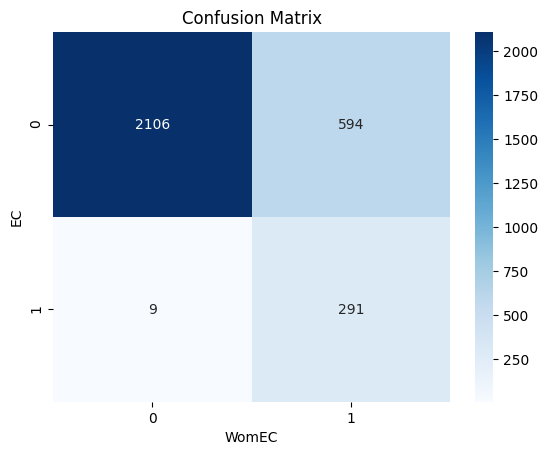

In [4]:
# Plot the confusion matrix indicating in the cell the True Positives, False Negatives, False Positives and True Negatives
confusion_matrix = [[TN, FP], [FN, TP]]
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('WomEC')
plt.ylabel('EC')
plt.title('Confusion Matrix')
plt.show()


Having 10 000 women though the pipeline, 3 000 will have with inconclusive pipelle results.

Of them, 2117 (2106+9) of them will have a negative result in WomEC and will avoid the hysteroscopy. Only one in 234 (TN/FN) will have EC and a negative WomEC. 

**Please note: according to this, for the positive WomECs, approximately 2 out of 3 positives will be false positives! They will go anyhow to biopsy most probably but I wanted to remark this to take it into acount when developing the story.**

In [5]:
print(f"TN/FN: {round(TN/+FN)}")

TN/FN: 234


# Study case 2: Conclusiveness

Here we are evaluating the improvement of having a more conclusive test in WomEC vs Pipelle.


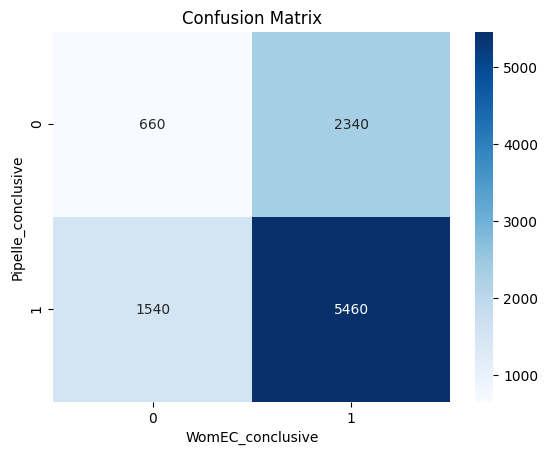

In [6]:
# Tiene resultados / no tiene resultados

p_womec_conclusive = 0.78
p_pipelle_conclusive = 0.7

a = N_SAMPLES*(1-p_womec_conclusive)*(1-p_pipelle_conclusive)
b = N_SAMPLES*(p_womec_conclusive)*(1-p_pipelle_conclusive)
c = N_SAMPLES*(1-p_womec_conclusive)*(p_pipelle_conclusive)
d = N_SAMPLES*(p_womec_conclusive)*(p_pipelle_conclusive)

confusion_matrix = [[a, b], [c, d]]
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('WomEC_conclusive')
plt.ylabel('Pipelle_conclusive')
plt.title('Confusion Matrix')
plt.show()

Here, 2850 women will have a conclusive WomEC test but an inconclusive pipelle, while 350 will have an inconclusive WomEC and a conclusive pipelle. Then the benefit is expressed by this ratio:

In [7]:
b/c

1.5194805194805203

**Note: Ángeles wasn't sure this is the good proportion. I'm putting it in bold to further discuss if necessary.**

### Both WomEC and pipelle are conclusive

As a contitnuation to the study case 2, we evaluate with numbers the confusion matrix of the two diagnostic methods.

In [8]:
p_both_conclusive = p_pipelle_conclusive * p_womec_conclusive
p_both_conclusive

0.5459999999999999

In [9]:
n_both_conclusive = round(N_SAMPLES * p_both_conclusive)
n_both_conclusive

5460

In [10]:
TN = SPECIFICITY_hat * P_nEC *  n_both_conclusive
FP = SENSITIVITY_hat * P_EC * n_both_conclusive
FN = (1 - SENSITIVITY_hat) * P_EC * n_both_conclusive
TP = (1 - SPECIFICITY_hat) * P_nEC  * n_both_conclusive

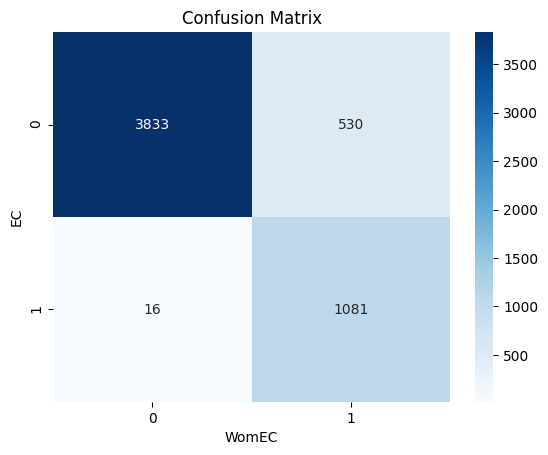

In [11]:
# Plot the confusion matrix indicating in the cell the True Positives, False Negatives, False Positives and True Negatives
confusion_matrix = [[TN, FP], [FN, TP]]
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('WomEC')
plt.ylabel('EC')
plt.title('Confusion Matrix')
plt.show()


With different numbers, this confussion matrix is proportional to the one in the study case one. 

**Here, in my opinion, we can only know the benefit if we compare the False Positives and False Negatives of WomEC versus the FP and FN of pipelle method, because both analyses were conclusive here. But this matrix by itself tell us nothing about the benefit of WomEC.**

**Do we know specificity and sensitivity of pipelle?**




# Study case 3: False negatives

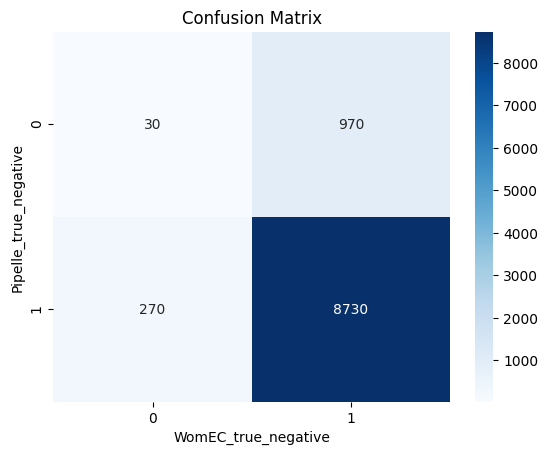

In [21]:
# Tiene resultados / no tiene resultados
N_SAMPLES = 10000
p_womec_tn = 0.97
p_pipelle_tn = 0.90

a = N_SAMPLES*(1-p_womec_tn)*(1-p_pipelle_tn)
b = N_SAMPLES*(p_womec_tn)*(1-p_pipelle_tn)
c = N_SAMPLES*(1-p_womec_tn)*(p_pipelle_tn)
d = N_SAMPLES*(p_womec_tn)*(p_pipelle_tn)

confusion_matrix = [[a, b], [c, d]]
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('WomEC_true_negative')
plt.ylabel('Pipelle_true_negative')
plt.title('Confusion Matrix')
plt.show()

In [22]:
b/c

3.592592592592588